Initial Generated Parameters
Initial w0:  8 , Initial w1:  1 

Part 2.1 - Stochastic Gradient Descent 

MSE (Training Data):  1.7254064066062185
MSE (Validation Data):  2.165080659135595


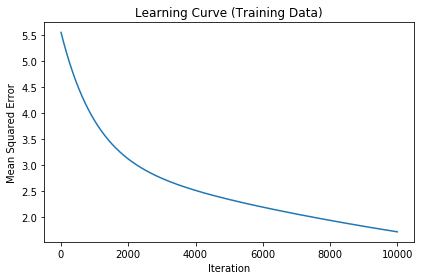

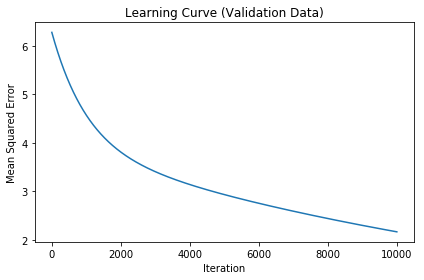

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

TRAIN_DATA = 'data/Dataset_2_train.csv'
VALID_DATA = 'data/Dataset_2_valid.csv'
TEST_DATA = 'data/Dataset_2_test.csv'

ERROR_THRESHOLD = 0.1
EPOCH_CYCLES = 10000

''' Parses the data file into a data frame object '''
def parseData(file):
    data_frame = pd.read_csv(file, header=None)
    data_frame.drop([2], axis=1, inplace=True)
    return data_frame

''' Computes the output of a given input using indicated parameters '''
def computeOutput(w0, w1, x):
    return w0 + w1 * x

''' Compute the mean squared error '''
def computeMSE(w0, w1, test_data):
    total_error = 0
    for i in range(test_data.shape[0]):
        predicted_output = computeOutput(w0, w1, test_data[0][i])
        actual_output = test_data[1][i]
        total_error += np.power(predicted_output - actual_output, 2)
    return total_error / test_data.shape[0]

''' Visualize the learning curve '''
def visualizeLearning(iteration_values, mse_values, title):
    plt.plot(iteration_values, mse_values)
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.tight_layout()
    plt.show()

''' Visualize the step sizes'''
def visualizeStepSizes(step_sizes, mse_values):
    plt.scatter(step_sizes, mse_values)
    plt.plot(step_sizes, mse_values)
    plt.xscale('log')
    plt.xticks(step_sizes)
    plt.title('Step Sizes vs MSE')
    plt.xlabel('Step Size')
    plt.ylabel('Mean Squared Error')
    plt.tight_layout()
    plt.show()

''' Visualize epoch in intervals'''
def visualizeEpoch(w_values, test_data):
    interval_length = [1, int(round(EPOCH_CYCLES/1000)), int(round(EPOCH_CYCLES/100)), int(round(EPOCH_CYCLES/10)), EPOCH_CYCLES-2]
    for i in range(5):
        plt.scatter(test_data[0], test_data[1])
        plt.plot(test_data[0],  w_values[interval_length[i]][0] + w_values[interval_length[i]][1] * test_data[0], 'r--')
        plt.title('Visualization After {} Cycle(s)'.format(interval_length[i]))
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.tight_layout()
        plt.show()

''' Performs the linear regression '''
def performLinearRegression(train_data, valid_data, step_size, w0, w1):
    iteration_values, mse_train_values, mse_valid_values, w_values = [], [], [], []
    for i in range(1, EPOCH_CYCLES):
        for j in range(train_data.shape[0]):
            predicted_output = computeOutput(w0, w1, train_data[0][j])
            actual_output = train_data[1][j]
            loss = predicted_output - actual_output
            w0 = w0 - step_size * loss
            w1 = w1 - step_size * loss * train_data[0][j]
        mse_train_values.append(computeMSE(w0, w1, train_data))
        mse_valid_values.append(computeMSE(w0, w1, valid_data))
        w_values.append([w0,w1])
        iteration_values.append(i)
    return iteration_values, mse_train_values, mse_valid_values, w_values, mse_train_values[EPOCH_CYCLES - 2], mse_valid_values[EPOCH_CYCLES - 2]

# Read data
train_data = parseData(TRAIN_DATA)
valid_data = parseData(VALID_DATA)
test_data = parseData(TEST_DATA)

# Generate initial params
w0, w1 = np.random.randint(0, 10), np.random.randint(0, 10)
print('Initial Generated Parameters')
print('Initial w0: ', w0, ', Initial w1: ', w1, '\n')

# Part 1
iteration_values, mse_train_values, mse_valid_values, w_values, best_mse_train, best_mse_valid = performLinearRegression(train_data, valid_data, 1e-6, w0, w1)
print('Part 2.1 - Stochastic Gradient Descent \n')
print('MSE (Training Data): ', best_mse_train)
print('MSE (Validation Data): ', best_mse_valid)
visualizeLearning(iteration_values, mse_train_values, 'Learning Curve (Training Data)')
visualizeLearning(iteration_values, mse_valid_values, 'Learning Curve (Validation Data)')

In [ ]:
# Part 2
step_sizes, mse_values, w = [], [], []
for i in range(1, 10):
    step_size = 1 * 10**(-i)
    iteration_values, mse_train_values, mse_valid_values, w_values, best_mse_train, best_mse_valid = performLinearRegression(train_data, valid_data, step_size, w0, w1)
    step_sizes.append(step_size)
    mse_values.append(best_mse_valid)
    w.append(w_values)
optimal_index = mse_values.index(min(mse_values))
optimal_step_size = step_sizes[optimal_index]
test_mse = computeMSE(w[optimal_index][EPOCH_CYCLES - 2][0], w[optimal_index][EPOCH_CYCLES - 2][1], test_data)
print('Part 2.2 - Varying Step Size \n')
print('Optimal step size: ', optimal_step_size)
print('Test MSE: ', test_mse)
visualizeStepSizes(step_sizes, mse_values)

Part 3.3 - Regression Fit Evolution 



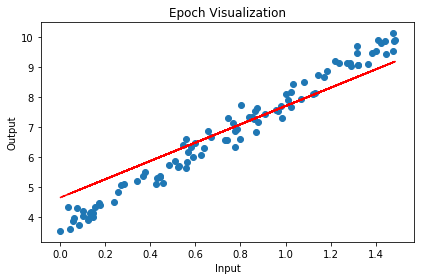

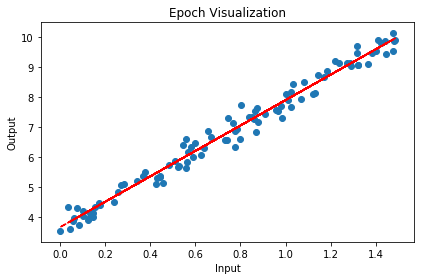

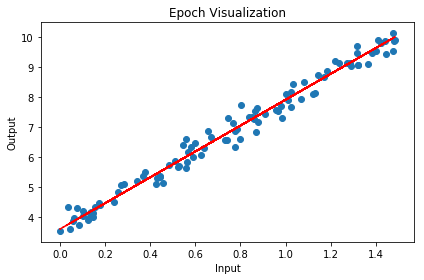

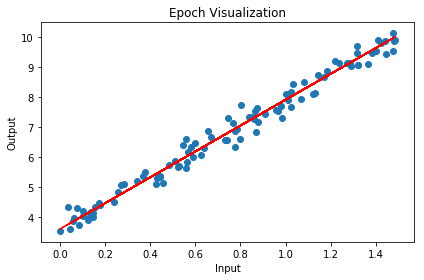

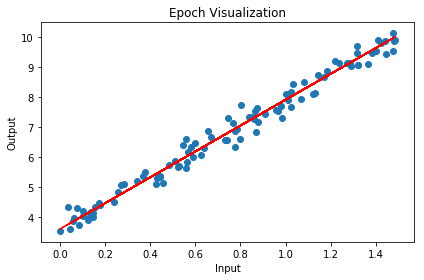

In [7]:
# Part 3
iteration_values, mse_train_values, mse_valid_values, w_values, best_mse_train, best_mse_valid = performLinearRegression(train_data, valid_data, optimal_step_size, w0, w1)
print('Part 3.3 - Regression Fit Evolution \n')
visualizeEpoch(w_values, test_data)